In [ ]:
#| hide
from ChemIITools.huckel import *
from ChemIITools.optimisation import *
import os

# ChemIITools

> Tools for Chemistry Part II programming

Documentation can be found at https://kgrewal1.github.io/ChemIITools/

## Install

```sh
pip install ChemIITools
```

## How to use

Easily solve the Huckel equation for complex systems

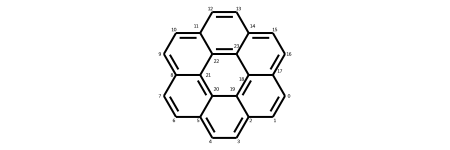

In [ ]:
molecule, energy_dict = Huckel_solve("c1cc2ccc3ccc4ccc5ccc6ccc1c7c2c3c4c5c67")
molecule

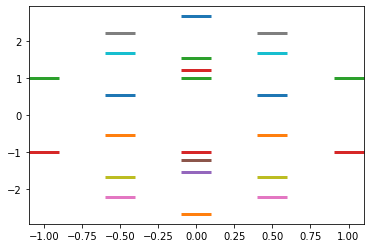

In [ ]:
MO_plot(energy_dict)

Plot potential energy surfaces of symmetric triatomics and find the vibrational frequencies

In [ ]:
#| echo: false
h2opath = ('../Ex2/H2Ooutfiles')
h2o_vals = {}
for filename in os.listdir(h2opath):
    output = parse_out(os.path.join(h2opath, filename))
    h2o_vals[output[0]] = output[1]

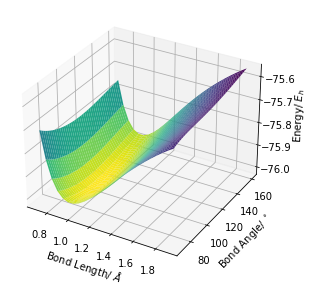

In [ ]:
surface_plot(h2o_vals)

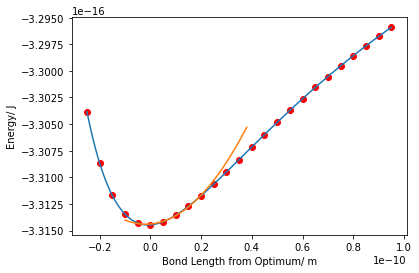

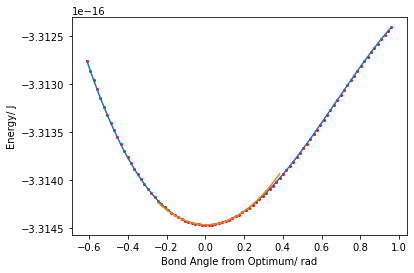

the optimum bond length of water is  0.95  angstroms with angle  105.0  degrees
the stretching frequency  93321760256726  cm-1 and bending frequency  4993  cm-1


In [ ]:
r_opt, theta_opt, nu_r, nu_theta = vib_calc(h2o_vals)
print('the optimum bond length of water is ', r_opt, ' angstroms with angle ', theta_opt, ' degrees' )
print('the stretching frequency ', round(nu_r), ' cm-1 and bending frequency ', round(nu_theta), ' cm-1' )